In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("GOOGL.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...,...
4426,2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4427,2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4428,2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
4429,2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700


In [7]:
df['Date']=pd.to_datetime(df['Date'])
import numpy as np
df.set_index('Date',inplace=True)
data=df[['Close']]

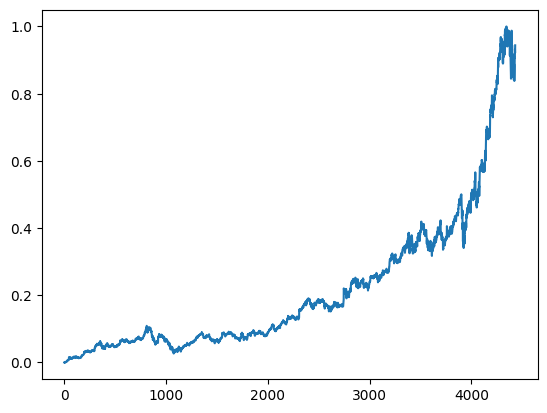

In [10]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler(feature_range=(0,1))
scaled_datat = scale.fit_transform(data)
import matplotlib.pyplot as plt 
plt.plot(scaled_datat)

In [14]:
def convert(data,time =30):
    x,y=[],[]
    for i in range(time,len(data)):
        x.append(data[i-time:i,0])
        y.append(data[i,0])
    return np.asarray(x),np.asarray(y)

x,y=convert(scaled_datat,60)
x=x.reshape(x.shape[0],x.shape[1],1)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,shuffle=False)


In [18]:
from keras.models import Sequential 
from keras.layers import Dense,SimpleRNN
model=Sequential()
model.add(SimpleRNN(units=40,return_sequences=False,input_shape=(x_train.shape[1],1)))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()
                    

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 40)                1680      
                                                                 
 dense (Dense)               (None, 1)                 41        
                                                                 
Total params: 1,721
Trainable params: 1,721
Non-trainable params: 0
_________________________________________________________________


In [20]:
history=model.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test))


Epoch 1/20
103/103 [==============================] - 2s 9ms/step - loss: 0.0017 - val_loss: 0.0510
Epoch 2/20
103/103 [==============================] - 1s 7ms/step - loss: 6.6013e-05 - val_loss: 0.0438
Epoch 3/20
103/103 [==============================] - 1s 8ms/step - loss: 5.5098e-05 - val_loss: 0.0375
Epoch 4/20
103/103 [==============================] - 1s 8ms/step - loss: 5.7100e-05 - val_loss: 0.0338
Epoch 5/20
103/103 [==============================] - 1s 7ms/step - loss: 4.4844e-05 - val_loss: 0.0279
Epoch 6/20
103/103 [==============================] - 1s 6ms/step - loss: 4.1703e-05 - val_loss: 0.0239
Epoch 7/20
103/103 [==============================] - 1s 7ms/step - loss: 4.1185e-05 - val_loss: 0.0220
Epoch 8/20
103/103 [==============================] - 1s 8ms/step - loss: 4.4699e-05 - val_loss: 0.0196
Epoch 9/20
103/103 [==============================] - 1s 8ms/step - loss: 3.8389e-05 - val_loss: 0.0170
Epoch 10/20
103/103 [==============================] - 1s 7ms/step -

35/35 [==============================] - 0s 3ms/step


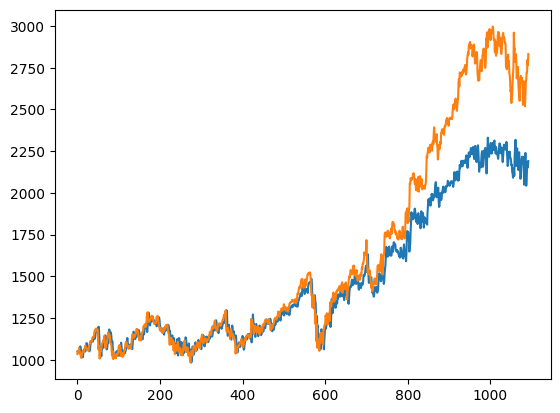

In [23]:
y_predict=model.predict(x_test)
y_predict=scale.inverse_transform(y_predict)
x_one=scale.inverse_transform(y_test.reshape(-1,1))
plt.plot(y_predict)
plt.plot(x_one)